In [51]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [52]:
PRCL = np.loadtxt('../Data/PRCL_OLTF.txt')
SRCL = np.loadtxt('../Data/SRCL_OLTF.txt')
MICH = np.loadtxt('../Data/MICH_OLTF.txt')

In [53]:
prcl_freq = []
prcl_mag = []
prcl_phs = []

srcl_freq = []
srcl_mag = []
srcl_phs = []

mich_freq = []
mich_mag = []
mich_phs = []

def parse_data(freq,mag,phs,dof):
    
    for i in range(len(dof)):
        freq.append(dof[i][0])
        
        real = dof[i][1]
        imag = dof[i][2]
        
        m = np.absolute(complex(real,imag))
        mag.append(m)
        
        p = np.angle(complex(real,imag))*180/np.pi
        phs.append(p)
    
    return freq,mag,phs

prcl_freq,prcl_mag,prcl_phs = parse_data(prcl_freq,prcl_mag,prcl_phs,PRCL)
srcl_freq,srcl_mag,srcl_phs = parse_data(srcl_freq,srcl_mag,srcl_phs,SRCL)
mich_freq,mich_mag,mich_phs = parse_data(mich_freq,mich_mag,mich_phs,MICH)

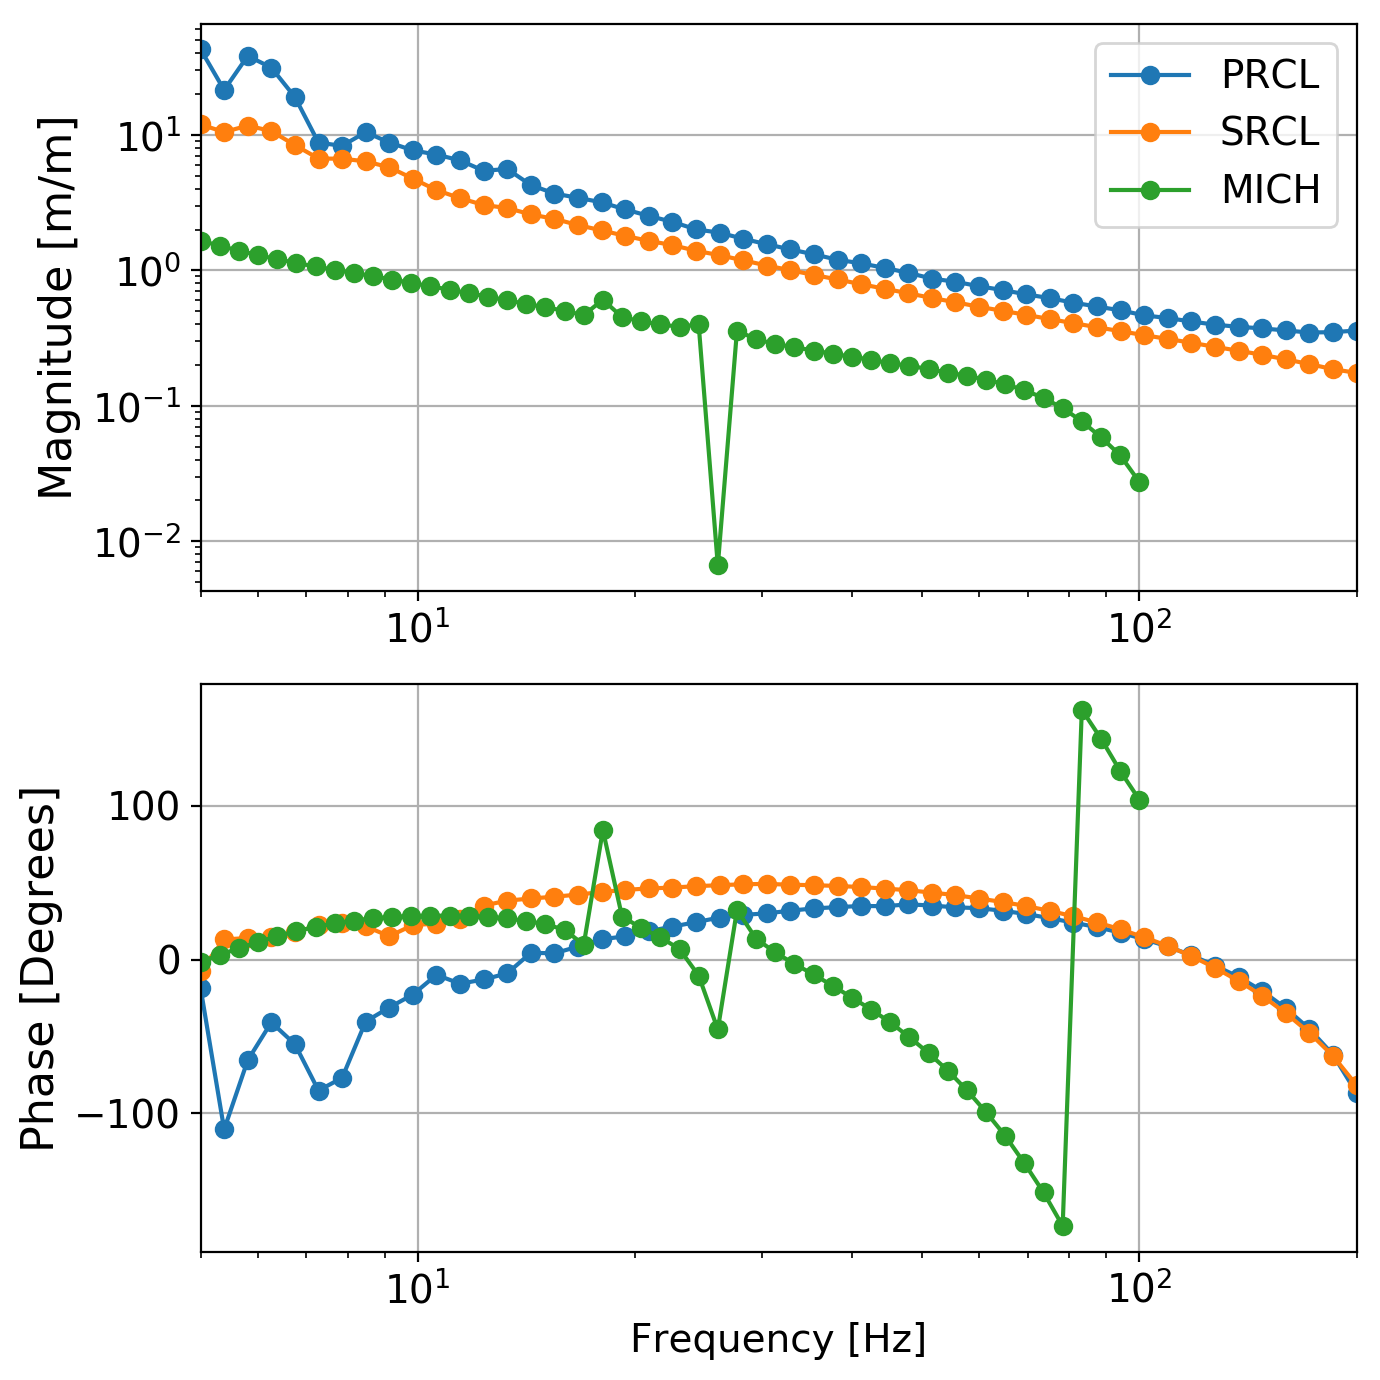

In [65]:
fig = plt.figure(figsize=(7,7),dpi=200)
ax = fig.add_subplot(211)
ax.loglog(prcl_freq,prcl_mag,'-o', label='PRCL')
ax.loglog(srcl_freq,srcl_mag,'-o', label='SRCL')
ax.loglog(mich_freq,mich_mag,'-o', label='MICH')
plt.legend(fontsize=14)

ax.set_ylabel('Magnitude [m/m]', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(min(prcl_freq),max(prcl_freq))
plt.grid()

bx = fig.add_subplot(212)
bx.semilogx(prcl_freq,prcl_phs,'-o')
bx.semilogx(srcl_freq,srcl_phs,'-o')
bx.semilogx(mich_freq,mich_phs,'-o')

bx.tick_params(axis='both', labelsize=14)
bx.set_xlim(min(prcl_freq),max(prcl_freq))
bx.set_ylabel('Phase [Degrees]', fontsize=16)
bx.set_xlabel('Frequency [Hz]',fontsize=14)

plt.grid()

#ax = fig.add_subplot(122)
#ax.plot(x*1e6,AS_DC, linewidth=4, label='AS_DC')
#ax.set_ylabel('Normalized Power', fontsize=16)
#ax.set_xlabel('ITM Diff. Thermal Lens  [$\mu$diopters]',fontsize=14)
#ax.tick_params(axis='both', labelsize=14)
#plt.legend(fontsize=14)
#plt.grid()
plt.tight_layout()

plt.savefig('../Figures/MeasuredVertexOLF.png')